In [ ]:
# Used https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html
# as reference and guide

In [16]:
%matplotlib inline
import mnist_reader
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import torch
import pandas as pd
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader



In [17]:
class Data(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.len = self.x.shape[0]

    def __getitem__(self,index):
        return self.x[index,:],self.y[index]

    def __len__(self):
        return self.len

In [18]:

X_train, y_train = mnist_reader.load_mnist('', kind='train')
X_test, y_test = mnist_reader.load_mnist('', kind='t10k')
img = X_train[0:5,:]
img = np.reshape(img,(5,28,28))


X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()

#split test validate and train X's
X_validate = X_train[54000:60000,:]
X_train = X_train[0:54000,:]
X_test = torch.tensor(X_test).float()
#split test validate and train y's
y_test = torch.tensor(y_test).float()
y_validate = y_train[54000:60000]
y_train = y_train[0:54000]

#put into a loader
train_data = Data(X_train,y_train)
train_loader = DataLoader(train_data,batch_size=200)
val_data = Data(X_validate,y_validate)
val_loader = DataLoader(val_data,batch_size=200)
test_data = Data(X_test,y_test)
test_loader = DataLoader(test_data,batch_size=200)

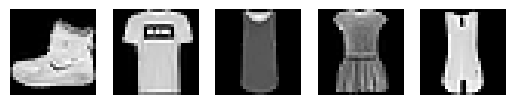

In [19]:
#showing 5 datas
fig,axes = plt.subplots(1,5)
for i in range(5):
    axes[i].imshow(img[i,:], cmap='gray')
    axes[i].axis('off')
plt.show()

In [20]:

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.neural = nn.Sequential(
            nn.Unflatten(1,torch.Size([1,28,28])),
            nn.Conv2d(1,4,3,padding=1),
            nn.BatchNorm2d(4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2,stride=2),
            nn.Conv2d(4,4,3,padding=1),
            nn.BatchNorm2d(4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2,stride=2),
            nn.Flatten(),
            nn.Linear(196,10),
            nn.Softmax(1)
        )

    def forward(self, x):
        x = self.neural(x)
        return x

In [21]:
net = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
train_loss = []
validate_loss = []

In [22]:

for epoch in range(25):  # loop over the dataset multiple times
    print(f'epoch {epoch} started') 
    running_loss = 0.0
    for x,y in train_loader:
        optimizer.zero_grad()
        outputs = net(x)
        loss = criterion(outputs, y.long())
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_loss.append(running_loss/54000)
    running_loss = 0
    for x,y in val_loader:
        outputs = net(x)
        loss = criterion(outputs,y.long())
        running_loss += loss.item()
    validate_loss.append(running_loss/6000)
print('Finished Training')

epoch 0 started
epoch 1 started
epoch 2 started
epoch 3 started
epoch 4 started
epoch 5 started
epoch 6 started
epoch 7 started
epoch 8 started
epoch 9 started
epoch 10 started
epoch 11 started
epoch 12 started
epoch 13 started
epoch 14 started
epoch 15 started
epoch 16 started
epoch 17 started
epoch 18 started
epoch 19 started
epoch 20 started
epoch 21 started
epoch 22 started
epoch 23 started
epoch 24 started
Finished Training


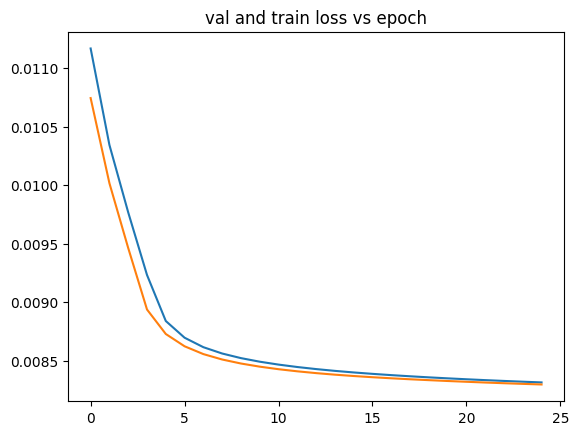

--------------------------------------------------------
Accuracy of training set: 0.8100185185185185
--------------------------------------------------------
Accuracy of validation set: 0.8108333333333333


In [23]:
#predicting for test and validationg along with ploting loss
from sklearn.metrics import accuracy_score
plt.plot(train_loss)
plt.plot(validate_loss)
plt.title("val and train loss vs epoch")
plt.show()
train_pred = []
validate_pred = []
for x,y in train_loader:
    outputs = net(x)
    labels = torch.max(outputs,1)[1]
    train_pred.append(labels)
train_pred = [element for sublist in train_pred for element in sublist]
for x,y in val_loader:
    outputs = net(x)
    labels = torch.max(outputs,1)[1]
    validate_pred.append(labels.flatten())
validate_pred = [element for sublist in validate_pred for element in sublist]
print('--------------------------------------------------------')
print("Accuracy of training set:", accuracy_score(y_train.detach().numpy(), train_pred))
print('--------------------------------------------------------')
print("Accuracy of validation set:", accuracy_score(y_validate.detach().numpy(), validate_pred))

In [25]:
test_pred = []
for x,y in test_loader:
    outputs = net(x)
    labels = torch.max(outputs,1)[1]
    test_pred.append(labels.flatten())
test_pred = [element for sublist in test_pred for element in sublist]
print('--------------------------------------------------------')
print("Accuracy of test set:", accuracy_score(y_test.detach().numpy(), test_pred))
print(test_pred)

--------------------------------------------------------
Accuracy of test set: 0.8055
[tensor(9), tensor(2), tensor(1), tensor(1), tensor(4), tensor(1), tensor(2), tensor(4), tensor(5), tensor(7), tensor(4), tensor(5), tensor(7), tensor(3), tensor(4), tensor(1), tensor(2), tensor(4), tensor(8), tensor(0), tensor(2), tensor(7), tensor(7), tensor(5), tensor(1), tensor(2), tensor(4), tensor(3), tensor(9), tensor(4), tensor(8), tensor(8), tensor(3), tensor(3), tensor(8), tensor(0), tensor(7), tensor(5), tensor(7), tensor(9), tensor(0), tensor(1), tensor(0), tensor(9), tensor(4), tensor(7), tensor(2), tensor(1), tensor(4), tensor(2), tensor(2), tensor(2), tensor(5), tensor(8), tensor(2), tensor(2), tensor(8), tensor(4), tensor(8), tensor(0), tensor(7), tensor(7), tensor(8), tensor(5), tensor(1), tensor(1), tensor(2), tensor(3), tensor(7), tensor(8), tensor(7), tensor(0), tensor(2), tensor(0), tensor(4), tensor(3), tensor(1), tensor(2), tensor(8), tensor(4), tensor(1), tensor(8), tensor(5), 